# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=True # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/v2_malli_base_dev_stoch'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear')

Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.947    |
| fps                | 1197     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0459   |
| total_timesteps    | 1616     |
| value_loss    

---------------------------------
| explained_variance | 0.759    |
| fps                | 2906     |
| nupdates           | 60       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00444  |
| total_timesteps    | 96960    |
| value_loss         | 2.8      |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2949     |
| nupdates           | 70       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0516   |
| total_timesteps    | 113120   |
| value_loss         | 0.695    |
---------------------------------
---------------------------------
| explained_variance | 0.87     |
| fps                | 2941     |
| nupdates           | 80       |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0115  |
| total_timesteps    | 129280   |
| value_loss         | 1.55     |
---------------------------------
---------------------------------
| explained_variance | 0.826    |
| fps         

---------------------------------
| explained_variance | 0.94     |
| fps                | 3186     |
| nupdates           | 330      |
| policy_entropy     | 0.97     |
| policy_loss        | 0.00509  |
| total_timesteps    | 533280   |
| value_loss         | 0.685    |
---------------------------------
---------------------------------
| explained_variance | 0.904    |
| fps                | 3189     |
| nupdates           | 340      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.171   |
| total_timesteps    | 549440   |
| value_loss         | 1.18     |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 3193     |
| nupdates           | 350      |
| policy_entropy     | 1.08     |
| policy_loss        | 0.113    |
| total_timesteps    | 565600   |
| value_loss         | 0.841    |
---------------------------------
---------------------------------
| explained_variance | 0.892    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 3228     |
| nupdates           | 600      |
| policy_entropy     | 0.985    |
| policy_loss        | 0.158    |
| total_timesteps    | 969600   |
| value_loss         | 0.095    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 3230     |
| nupdates           | 610      |
| policy_entropy     | 0.967    |
| policy_loss        | 0.0392   |
| total_timesteps    | 985760   |
| value_loss         | 0.673    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 3227     |
| nupdates           | 620      |
| policy_entropy     | 0.909    |
| policy_loss        | -0.0551  |
| total_timesteps    | 1001920  |
| value_loss         | 0.716    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.949    |
| fps                | 3234     |
| nupdates           | 870      |
| policy_entropy     | 0.905    |
| policy_loss        | -0.0127  |
| total_timesteps    | 1405920  |
| value_loss         | 0.664    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3235     |
| nupdates           | 880      |
| policy_entropy     | 0.961    |
| policy_loss        | 0.084    |
| total_timesteps    | 1422080  |
| value_loss         | 0.0617   |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 3236     |
| nupdates           | 890      |
| policy_entropy     | 0.931    |
| policy_loss        | 0.0293   |
| total_timesteps    | 1438240  |
| value_loss         | 0.617    |
---------------------------------
---------------------------------
| explained_variance | 0.829    |
| fps         

---------------------------------
| explained_variance | 0.947    |
| fps                | 3238     |
| nupdates           | 1140     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0217  |
| total_timesteps    | 1842240  |
| value_loss         | 0.677    |
---------------------------------
---------------------------------
| explained_variance | 0.825    |
| fps                | 3239     |
| nupdates           | 1150     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.118   |
| total_timesteps    | 1858400  |
| value_loss         | 2.27     |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3238     |
| nupdates           | 1160     |
| policy_entropy     | 0.999    |
| policy_loss        | 0.105    |
| total_timesteps    | 1874560  |
| value_loss         | 0.0447   |
---------------------------------
---------------------------------
| explained_variance | 0.902    |
| fps         

---------------------------------
| explained_variance | 0.813    |
| fps                | 3239     |
| nupdates           | 1410     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0677  |
| total_timesteps    | 2278560  |
| value_loss         | 2.49     |
---------------------------------
---------------------------------
| explained_variance | 0.879    |
| fps                | 3237     |
| nupdates           | 1420     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.148   |
| total_timesteps    | 2294720  |
| value_loss         | 1.55     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 3237     |
| nupdates           | 1430     |
| policy_entropy     | 0.958    |
| policy_loss        | -0.0724  |
| total_timesteps    | 2310880  |
| value_loss         | 0.818    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 3244     |
| nupdates           | 1680     |
| policy_entropy     | 0.942    |
| policy_loss        | 0.12     |
| total_timesteps    | 2714880  |
| value_loss         | 0.0803   |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 3244     |
| nupdates           | 1690     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0655  |
| total_timesteps    | 2731040  |
| value_loss         | 0.74     |
---------------------------------
---------------------------------
| explained_variance | 0.878    |
| fps                | 3245     |
| nupdates           | 1700     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0722  |
| total_timesteps    | 2747200  |
| value_loss         | 1.71     |
---------------------------------
---------------------------------
| explained_variance | 0.884    |
| fps         

---------------------------------
| explained_variance | 0.692    |
| fps                | 3244     |
| nupdates           | 1950     |
| policy_entropy     | 0.931    |
| policy_loss        | -0.125   |
| total_timesteps    | 3151200  |
| value_loss         | 3.48     |
---------------------------------
---------------------------------
| explained_variance | 0.774    |
| fps                | 3244     |
| nupdates           | 1960     |
| policy_entropy     | 0.937    |
| policy_loss        | 0.037    |
| total_timesteps    | 3167360  |
| value_loss         | 2.8      |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 3244     |
| nupdates           | 1970     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0493   |
| total_timesteps    | 3183520  |
| value_loss         | 0.645    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.921    |
| fps                | 3246     |
| nupdates           | 2220     |
| policy_entropy     | 0.903    |
| policy_loss        | -0.0871  |
| total_timesteps    | 3587520  |
| value_loss         | 1.13     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 3246     |
| nupdates           | 2230     |
| policy_entropy     | 0.968    |
| policy_loss        | 0.042    |
| total_timesteps    | 3603680  |
| value_loss         | 0.65     |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 3246     |
| nupdates           | 2240     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0542  |
| total_timesteps    | 3619840  |
| value_loss         | 0.855    |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 3233     |
| nupdates           | 2490     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0457  |
| total_timesteps    | 4023840  |
| value_loss         | 0.619    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 3232     |
| nupdates           | 2500     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0523   |
| total_timesteps    | 4040000  |
| value_loss         | 0.0921   |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 3230     |
| nupdates           | 2510     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0757  |
| total_timesteps    | 4056160  |
| value_loss         | 1.31     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.917    |
| fps                | 3201     |
| nupdates           | 2760     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.115   |
| total_timesteps    | 4460160  |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0.888    |
| fps                | 3199     |
| nupdates           | 2770     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00497 |
| total_timesteps    | 4476320  |
| value_loss         | 1.67     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 3198     |
| nupdates           | 2780     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.0849   |
| total_timesteps    | 4492480  |
| value_loss         | 0.695    |
---------------------------------
---------------------------------
| explained_variance | 0.907    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 3178     |
| nupdates           | 3030     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.077    |
| total_timesteps    | 4896480  |
| value_loss         | 0.73     |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 3178     |
| nupdates           | 3040     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0139  |
| total_timesteps    | 4912640  |
| value_loss         | 0.915    |
---------------------------------
---------------------------------
| explained_variance | 0.475    |
| fps                | 3178     |
| nupdates           | 3050     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.486   |
| total_timesteps    | 4928800  |
| value_loss         | 6.59     |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 3184     |
| nupdates           | 3300     |
| policy_entropy     | 0.959    |
| policy_loss        | 0.098    |
| total_timesteps    | 5332800  |
| value_loss         | 0.456    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 3185     |
| nupdates           | 3310     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0109   |
| total_timesteps    | 5348960  |
| value_loss         | 0.684    |
---------------------------------
---------------------------------
| explained_variance | 0.681    |
| fps                | 3185     |
| nupdates           | 3320     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.28    |
| total_timesteps    | 5365120  |
| value_loss         | 4.09     |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 3192     |
| nupdates           | 3570     |
| policy_entropy     | 1        |
| policy_loss        | 0.0486   |
| total_timesteps    | 5769120  |
| value_loss         | 0.656    |
---------------------------------
---------------------------------
| explained_variance | 0.807    |
| fps                | 3191     |
| nupdates           | 3580     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.17    |
| total_timesteps    | 5785280  |
| value_loss         | 2.45     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3192     |
| nupdates           | 3590     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0842   |
| total_timesteps    | 5801440  |
| value_loss         | 0.0944   |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 3182     |
| nupdates           | 3840     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0961   |
| total_timesteps    | 6205440  |
| value_loss         | 0.048    |
---------------------------------
---------------------------------
| explained_variance | 0.761    |
| fps                | 3182     |
| nupdates           | 3850     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.277   |
| total_timesteps    | 6221600  |
| value_loss         | 3.12     |
---------------------------------
---------------------------------
| explained_variance | 0.496    |
| fps                | 3183     |
| nupdates           | 3860     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.384   |
| total_timesteps    | 6237760  |
| value_loss         | 5.08     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 3182     |
| nupdates           | 4110     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0369   |
| total_timesteps    | 6641760  |
| value_loss         | 0.619    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3182     |
| nupdates           | 4120     |
| policy_entropy     | 0.982    |
| policy_loss        | 0.088    |
| total_timesteps    | 6657920  |
| value_loss         | 0.0538   |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 3182     |
| nupdates           | 4130     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.187   |
| total_timesteps    | 6674080  |
| value_loss         | 1.27     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.843    |
| fps                | 3186     |
| nupdates           | 4380     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.123   |
| total_timesteps    | 7078080  |
| value_loss         | 1.82     |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 3187     |
| nupdates           | 4390     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.0572   |
| total_timesteps    | 7094240  |
| value_loss         | 0.686    |
---------------------------------
---------------------------------
| explained_variance | 0.888    |
| fps                | 3187     |
| nupdates           | 4400     |
| policy_entropy     | 1        |
| policy_loss        | -0.0684  |
| total_timesteps    | 7110400  |
| value_loss         | 1.28     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.898    |
| fps                | 3193     |
| nupdates           | 4650     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0446  |
| total_timesteps    | 7514400  |
| value_loss         | 1.4      |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 3193     |
| nupdates           | 4660     |
| policy_entropy     | 0.998    |
| policy_loss        | 0.0261   |
| total_timesteps    | 7530560  |
| value_loss         | 0.809    |
---------------------------------
---------------------------------
| explained_variance | 0.653    |
| fps                | 3193     |
| nupdates           | 4670     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.122   |
| total_timesteps    | 7546720  |
| value_loss         | 4.52     |
---------------------------------
---------------------------------
| explained_variance | 0.757    |
| fps         

---------------------------------
| explained_variance | 0.946    |
| fps                | 3194     |
| nupdates           | 4920     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.046    |
| total_timesteps    | 7950720  |
| value_loss         | 0.809    |
---------------------------------
---------------------------------
| explained_variance | 0.371    |
| fps                | 3194     |
| nupdates           | 4930     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.416   |
| total_timesteps    | 7966880  |
| value_loss         | 8.58     |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 3194     |
| nupdates           | 4940     |
| policy_entropy     | 1        |
| policy_loss        | 0.0509   |
| total_timesteps    | 7983040  |
| value_loss         | 1.15     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.895    |
| fps                | 3188     |
| nupdates           | 5190     |
| policy_entropy     | 1.13     |
| policy_loss        | 0.0433   |
| total_timesteps    | 8387040  |
| value_loss         | 1.45     |
---------------------------------
---------------------------------
| explained_variance | 0.886    |
| fps                | 3189     |
| nupdates           | 5200     |
| policy_entropy     | 0.965    |
| policy_loss        | 0.0109   |
| total_timesteps    | 8403200  |
| value_loss         | 1.42     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 3189     |
| nupdates           | 5210     |
| policy_entropy     | 0.987    |
| policy_loss        | 0.0701   |
| total_timesteps    | 8419360  |
| value_loss         | 0.68     |
---------------------------------
---------------------------------
| explained_variance | 0.852    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3195     |
| nupdates           | 5460     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.151    |
| total_timesteps    | 8823360  |
| value_loss         | 0.109    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3195     |
| nupdates           | 5470     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.151    |
| total_timesteps    | 8839520  |
| value_loss         | 0.0996   |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps                | 3196     |
| nupdates           | 5480     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.106   |
| total_timesteps    | 8855680  |
| value_loss         | 1.81     |
---------------------------------
---------------------------------
| explained_variance | 0.684    |
| fps         

---------------------------------
| explained_variance | 0.745    |
| fps                | 3201     |
| nupdates           | 5730     |
| policy_entropy     | 0.992    |
| policy_loss        | 0.0177   |
| total_timesteps    | 9259680  |
| value_loss         | 3.53     |
---------------------------------
---------------------------------
| explained_variance | 0.921    |
| fps                | 3201     |
| nupdates           | 5740     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0419  |
| total_timesteps    | 9275840  |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 3201     |
| nupdates           | 5750     |
| policy_entropy     | 0.97     |
| policy_loss        | 0.059    |
| total_timesteps    | 9292000  |
| value_loss         | 0.69     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 3206     |
| nupdates           | 6000     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.126    |
| total_timesteps    | 9696000  |
| value_loss         | 0.104    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3206     |
| nupdates           | 6010     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.131    |
| total_timesteps    | 9712160  |
| value_loss         | 0.0798   |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 3206     |
| nupdates           | 6020     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0231  |
| total_timesteps    | 9728320  |
| value_loss         | 1.7      |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps         

---------------------------------
| explained_variance | 0.756    |
| fps                | 3204     |
| nupdates           | 6270     |
| policy_entropy     | 0.99     |
| policy_loss        | 0.0334   |
| total_timesteps    | 10132320 |
| value_loss         | 3.05     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3204     |
| nupdates           | 6280     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.138    |
| total_timesteps    | 10148480 |
| value_loss         | 0.117    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3203     |
| nupdates           | 6290     |
| policy_entropy     | 0.937    |
| policy_loss        | 0.126    |
| total_timesteps    | 10164640 |
| value_loss         | 0.0839   |
---------------------------------
---------------------------------
| explained_variance | 0.88     |
| fps         

---------------------------------
| explained_variance | 0.755    |
| fps                | 3196     |
| nupdates           | 6540     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.242   |
| total_timesteps    | 10568640 |
| value_loss         | 3.05     |
---------------------------------
---------------------------------
| explained_variance | 0.758    |
| fps                | 3196     |
| nupdates           | 6550     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.252   |
| total_timesteps    | 10584800 |
| value_loss         | 3.42     |
---------------------------------
---------------------------------
| explained_variance | 0.728    |
| fps                | 3196     |
| nupdates           | 6560     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.141   |
| total_timesteps    | 10600960 |
| value_loss         | 3.91     |
---------------------------------
---------------------------------
| explained_variance | 0.717    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 3192     |
| nupdates           | 6810     |
| policy_entropy     | 0.989    |
| policy_loss        | 0.108    |
| total_timesteps    | 11004960 |
| value_loss         | 0.063    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3192     |
| nupdates           | 6820     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.204    |
| total_timesteps    | 11021120 |
| value_loss         | 0.126    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3192     |
| nupdates           | 6830     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.103    |
| total_timesteps    | 11037280 |
| value_loss         | 0.0763   |
---------------------------------
---------------------------------
| explained_variance | 0.829    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 3186     |
| nupdates           | 7080     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.138    |
| total_timesteps    | 11441280 |
| value_loss         | 0.0921   |
---------------------------------
---------------------------------
| explained_variance | 0.759    |
| fps                | 3186     |
| nupdates           | 7090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.106   |
| total_timesteps    | 11457440 |
| value_loss         | 3.48     |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 3186     |
| nupdates           | 7100     |
| policy_entropy     | 1        |
| policy_loss        | -0.0174  |
| total_timesteps    | 11473600 |
| value_loss         | 1.35     |
---------------------------------
---------------------------------
| explained_variance | 0.626    |
| fps         

---------------------------------
| explained_variance | 0.61     |
| fps                | 3181     |
| nupdates           | 7350     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.121   |
| total_timesteps    | 11877600 |
| value_loss         | 5.45     |
---------------------------------
---------------------------------
| explained_variance | 0.877    |
| fps                | 3181     |
| nupdates           | 7360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0459  |
| total_timesteps    | 11893760 |
| value_loss         | 1.61     |
---------------------------------
---------------------------------
| explained_variance | 0.887    |
| fps                | 3181     |
| nupdates           | 7370     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.138   |
| total_timesteps    | 11909920 |
| value_loss         | 1.63     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 3175     |
| nupdates           | 7620     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.148    |
| total_timesteps    | 12313920 |
| value_loss         | 0.119    |
---------------------------------
---------------------------------
| explained_variance | 0.81     |
| fps                | 3174     |
| nupdates           | 7630     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.211   |
| total_timesteps    | 12330080 |
| value_loss         | 2.23     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3174     |
| nupdates           | 7640     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.148    |
| total_timesteps    | 12346240 |
| value_loss         | 0.0792   |
---------------------------------
---------------------------------
| explained_variance | 0.847    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 3168     |
| nupdates           | 7890     |
| policy_entropy     | 1.13     |
| policy_loss        | 0.162    |
| total_timesteps    | 12750240 |
| value_loss         | 0.0994   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 3168     |
| nupdates           | 7900     |
| policy_entropy     | 1.09     |
| policy_loss        | 0.152    |
| total_timesteps    | 12766400 |
| value_loss         | 0.136    |
---------------------------------
---------------------------------
| explained_variance | 0.786    |
| fps                | 3167     |
| nupdates           | 7910     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.345   |
| total_timesteps    | 12782560 |
| value_loss         | 2.76     |
---------------------------------
---------------------------------
| explained_variance | 0.919    |
| fps         

---------------------------------
| explained_variance | 0.871    |
| fps                | 3162     |
| nupdates           | 8160     |
| policy_entropy     | 1.11     |
| policy_loss        | 0.044    |
| total_timesteps    | 13186560 |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 3162     |
| nupdates           | 8170     |
| policy_entropy     | 1.09     |
| policy_loss        | 0.129    |
| total_timesteps    | 13202720 |
| value_loss         | 0.674    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3161     |
| nupdates           | 8180     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.174    |
| total_timesteps    | 13218880 |
| value_loss         | 0.123    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.852    |
| fps                | 3157     |
| nupdates           | 8430     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0537   |
| total_timesteps    | 13622880 |
| value_loss         | 1.74     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 3157     |
| nupdates           | 8440     |
| policy_entropy     | 0.999    |
| policy_loss        | 0.00587  |
| total_timesteps    | 13639040 |
| value_loss         | 0.651    |
---------------------------------
---------------------------------
| explained_variance | 0.732    |
| fps                | 3157     |
| nupdates           | 8450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.416   |
| total_timesteps    | 13655200 |
| value_loss         | 3.49     |
---------------------------------
---------------------------------
| explained_variance | 0.684    |
| fps         

---------------------------------
| explained_variance | 0.755    |
| fps                | 3156     |
| nupdates           | 8700     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.21    |
| total_timesteps    | 14059200 |
| value_loss         | 3.2      |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3156     |
| nupdates           | 8710     |
| policy_entropy     | 1.09     |
| policy_loss        | 0.132    |
| total_timesteps    | 14075360 |
| value_loss         | 0.0969   |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps                | 3155     |
| nupdates           | 8720     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.00929 |
| total_timesteps    | 14091520 |
| value_loss         | 1.27     |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.904    |
| fps                | 3151     |
| nupdates           | 8970     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0342  |
| total_timesteps    | 14495520 |
| value_loss         | 1.38     |
---------------------------------
---------------------------------
| explained_variance | 0.743    |
| fps                | 3151     |
| nupdates           | 8980     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.407   |
| total_timesteps    | 14511680 |
| value_loss         | 3.74     |
---------------------------------
---------------------------------
| explained_variance | 0.814    |
| fps                | 3151     |
| nupdates           | 8990     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.27    |
| total_timesteps    | 14527840 |
| value_loss         | 2.37     |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.936    |
| fps                | 3144     |
| nupdates           | 9240     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0068  |
| total_timesteps    | 14931840 |
| value_loss         | 0.824    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3144     |
| nupdates           | 9250     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.102    |
| total_timesteps    | 14948000 |
| value_loss         | 0.0633   |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 3143     |
| nupdates           | 9260     |
| policy_entropy     | 1.1      |
| policy_loss        | 0.0551   |
| total_timesteps    | 14964160 |
| value_loss         | 0.647    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 3138     |
| nupdates           | 9510     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.155    |
| total_timesteps    | 15368160 |
| value_loss         | 0.132    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 3138     |
| nupdates           | 9520     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.179    |
| total_timesteps    | 15384320 |
| value_loss         | 0.127    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 3138     |
| nupdates           | 9530     |
| policy_entropy     | 1.11     |
| policy_loss        | 0.105    |
| total_timesteps    | 15400480 |
| value_loss         | 0.674    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.786    |
| fps                | 3133     |
| nupdates           | 9780     |
| policy_entropy     | 1        |
| policy_loss        | -0.0388  |
| total_timesteps    | 15804480 |
| value_loss         | 2.51     |
---------------------------------
---------------------------------
| explained_variance | 0.812    |
| fps                | 3133     |
| nupdates           | 9790     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0824  |
| total_timesteps    | 15820640 |
| value_loss         | 2.18     |
---------------------------------
---------------------------------
| explained_variance | 0.735    |
| fps                | 3133     |
| nupdates           | 9800     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.019   |
| total_timesteps    | 15836800 |
| value_loss         | 3.38     |
---------------------------------
---------------------------------
| explained_variance | 0.419    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 3128     |
| nupdates           | 10050    |
| policy_entropy     | 1.06     |
| policy_loss        | 0.181    |
| total_timesteps    | 16240800 |
| value_loss         | 0.0827   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 3127     |
| nupdates           | 10060    |
| policy_entropy     | 1.04     |
| policy_loss        | 0.143    |
| total_timesteps    | 16256960 |
| value_loss         | 0.0795   |
---------------------------------
---------------------------------
| explained_variance | 0.699    |
| fps                | 3127     |
| nupdates           | 10070    |
| policy_entropy     | 1.06     |
| policy_loss        | -0.226   |
| total_timesteps    | 16273120 |
| value_loss         | 3.8      |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps         

---------------------------------
| explained_variance | 0.896    |
| fps                | 3127     |
| nupdates           | 10320    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.0346   |
| total_timesteps    | 16677120 |
| value_loss         | 1.33     |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 3127     |
| nupdates           | 10330    |
| policy_entropy     | 1.05     |
| policy_loss        | 0.133    |
| total_timesteps    | 16693280 |
| value_loss         | 0.729    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3127     |
| nupdates           | 10340    |
| policy_entropy     | 1.03     |
| policy_loss        | 0.165    |
| total_timesteps    | 16709440 |
| value_loss         | 0.111    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps         

---------------------------------
| explained_variance | 0.934    |
| fps                | 3120     |
| nupdates           | 10590    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00908 |
| total_timesteps    | 17113440 |
| value_loss         | 0.869    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3120     |
| nupdates           | 10600    |
| policy_entropy     | 1.15     |
| policy_loss        | 0.12     |
| total_timesteps    | 17129600 |
| value_loss         | 0.0512   |
---------------------------------
---------------------------------
| explained_variance | 0.881    |
| fps                | 3120     |
| nupdates           | 10610    |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0756  |
| total_timesteps    | 17145760 |
| value_loss         | 1.49     |
---------------------------------
---------------------------------
| explained_variance | 0.667    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 3120     |
| nupdates           | 10860    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.145    |
| total_timesteps    | 17549760 |
| value_loss         | 0.0898   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 3120     |
| nupdates           | 10870    |
| policy_entropy     | 1.07     |
| policy_loss        | 0.153    |
| total_timesteps    | 17565920 |
| value_loss         | 0.094    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 3120     |
| nupdates           | 10880    |
| policy_entropy     | 1.09     |
| policy_loss        | 0.0775   |
| total_timesteps    | 17582080 |
| value_loss         | 0.638    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.89     |
| fps                | 3120     |
| nupdates           | 11130    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0168  |
| total_timesteps    | 17986080 |
| value_loss         | 1.41     |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3120     |
| nupdates           | 11140    |
| policy_entropy     | 1.07     |
| policy_loss        | 0.154    |
| total_timesteps    | 18002240 |
| value_loss         | 0.0532   |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 3119     |
| nupdates           | 11150    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0122  |
| total_timesteps    | 18018400 |
| value_loss         | 0.981    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 3121     |
| nupdates           | 11400    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.0699   |
| total_timesteps    | 18422400 |
| value_loss         | 0.657    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 3121     |
| nupdates           | 11410    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.106    |
| total_timesteps    | 18438560 |
| value_loss         | 0.637    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 3121     |
| nupdates           | 11420    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.0404   |
| total_timesteps    | 18454720 |
| value_loss         | 0.669    |
---------------------------------
---------------------------------
| explained_variance | 0.899    |
| fps         

---------------------------------
| explained_variance | 0.834    |
| fps                | 3121     |
| nupdates           | 11670    |
| policy_entropy     | 1.08     |
| policy_loss        | -0.138   |
| total_timesteps    | 18858720 |
| value_loss         | 2.03     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 3121     |
| nupdates           | 11680    |
| policy_entropy     | 1.13     |
| policy_loss        | 0.128    |
| total_timesteps    | 18874880 |
| value_loss         | 0.702    |
---------------------------------
---------------------------------
| explained_variance | 0.883    |
| fps                | 3121     |
| nupdates           | 11690    |
| policy_entropy     | 1.19     |
| policy_loss        | -0.0274  |
| total_timesteps    | 18891040 |
| value_loss         | 1.33     |
---------------------------------


Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 20000
Ave reward 211.68065922139053


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


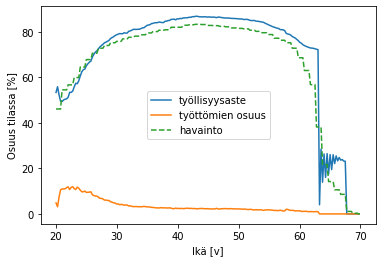

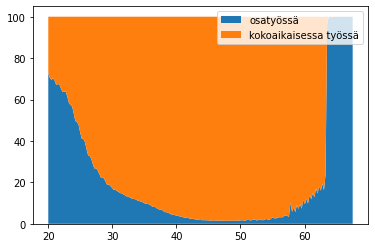

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


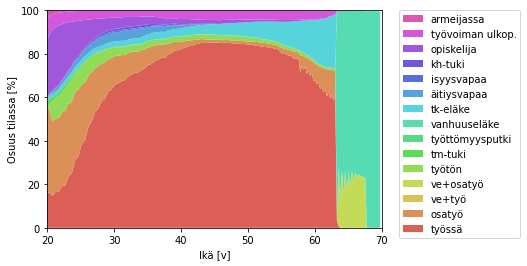

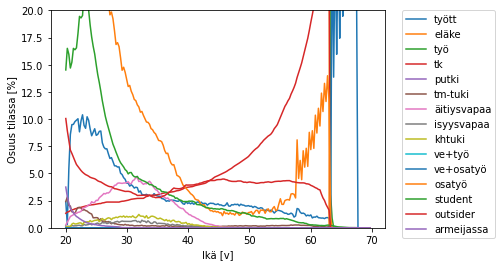

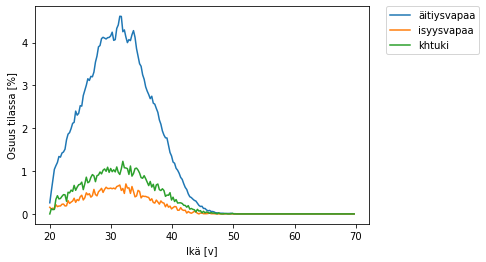

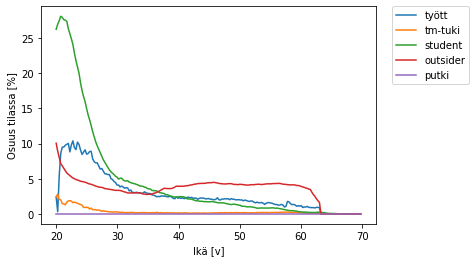

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


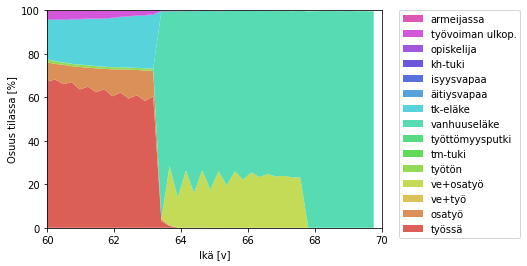

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+----------------------+
|                  |                  e/v |              toteuma |                  ero |
|------------------+----------------------+----------------------+----------------------|
| palkkatulo       | 90,863,400,763.62    | 89,134,200,000.00    |  1,729,200,763.62    |
| etuusmeno        | 36,656,762,311.81    | 36,945,147,749.00    |   -288,385,437.19    |
| verot+maksut     | 31,585,052,568.41    | 30,763,000,000.00    |    822,052,568.41    |
| muut tulot       |  5,071,709,743.40    |  6,182,147,749.00    | -1,110,438,005.60    |
| valtionvero      |  3,217,252,504.91    |  5,542,000,000.00    | -2,324,747,495.09    |
| kunnallisvero    | 19,049,006,540.86    | 18,991,000,000.00    |     58,006,540.86    |
| ptel             |  5,769,825,948.49    |  5,560,000,000.00    |    209,825,948.49    |
| tyotvakmaksu     |  1,726,404,614.51    |  1,693,549,800.00  

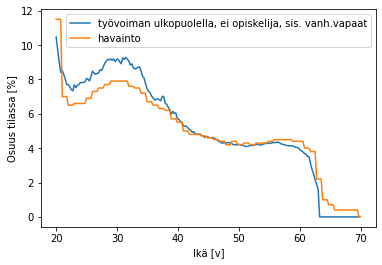

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.64 |      0.29 |       0.06 |      0.01 |        0.00 |
| 30-39 |     0.69 |      0.20 |       0.10 |      0.01 |        0.00 |
| 40-49 |     0.82 |      0.13 |       0.05 |      0.00 |        0.00 |
| 50-59 |     0.95 |      0.04 |       0.01 |      0.00 |        0.00 |
| 60-65 |     1.00 |      0.00 |       0.00 |      0.00 |        0.00 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.42 |      0.40 |       0.17 |      0.01 |        0.00 |
| 30-39 |     0.71 |      0.15 |       0.13 |      0.01 |        0.00 |
| 40-49 |     0.74 |      0.14 |       0.12 |      0.00 |        0.00 |
| 50-59 |     0.84 |      0.13 |       0.03 |      0.00 |        0.00 |
| 60-65 |     0.98 |      0.01 |       0.00 |      0.00 |        0.00 |
+-------+----------+-----------+------------+-----------+-------------+


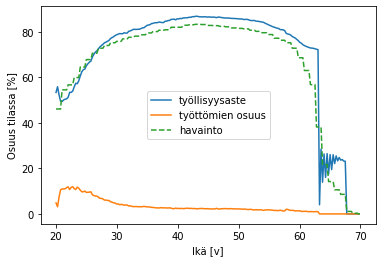

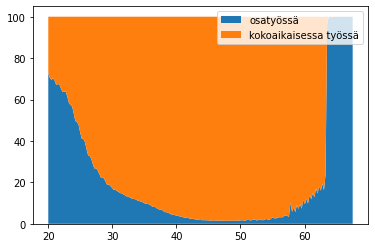

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


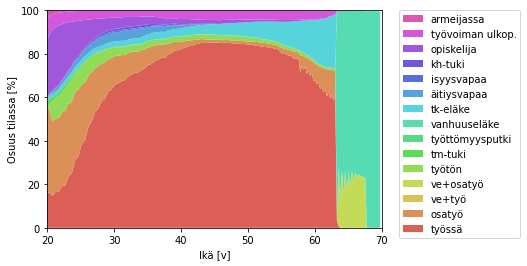

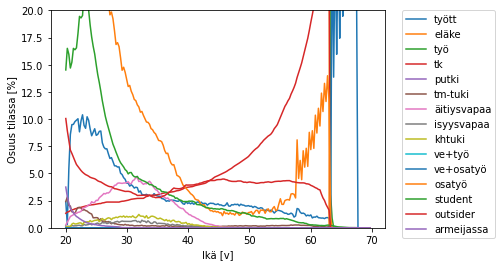

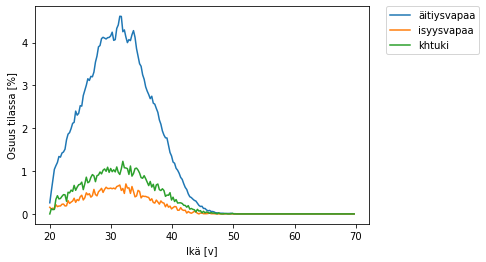

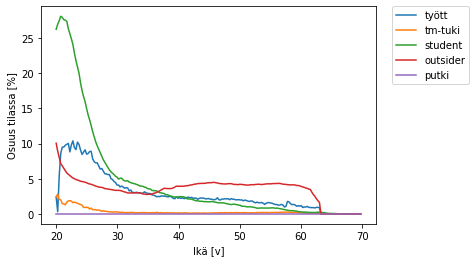

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


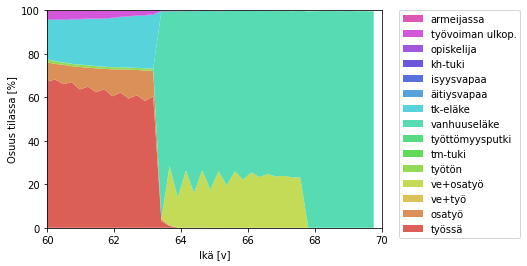

Lisäpäivillä on 0 henkilöä


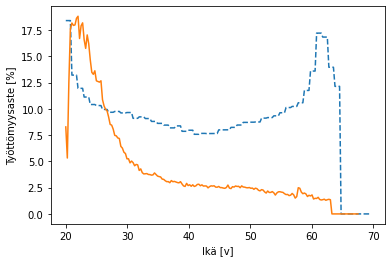

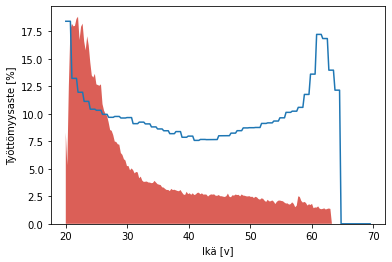

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


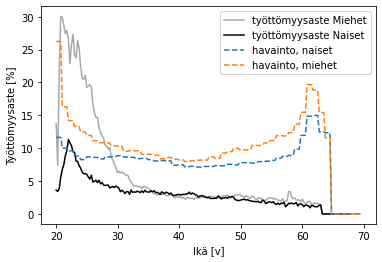

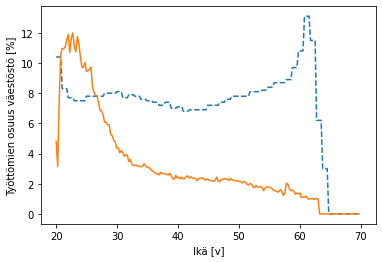

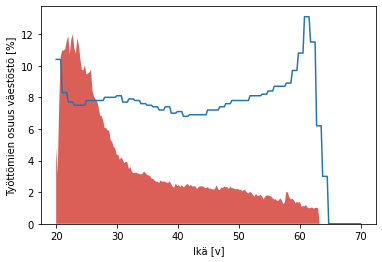

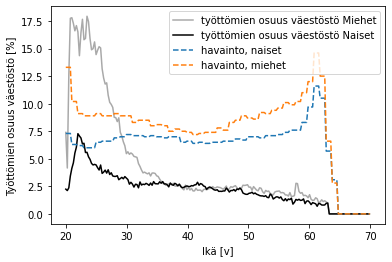

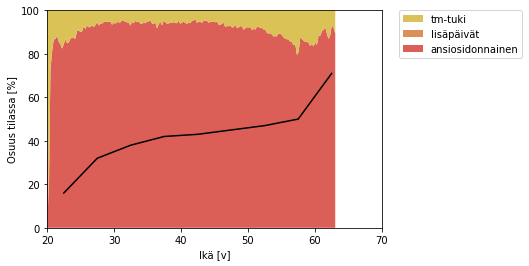

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


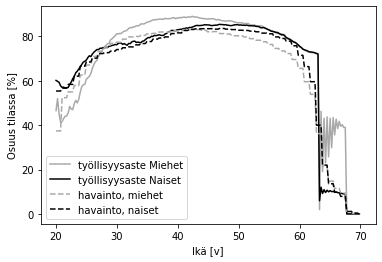

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


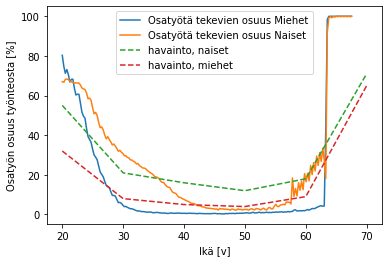

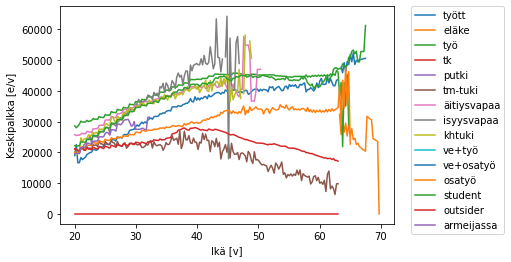

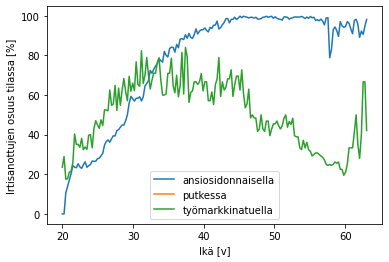

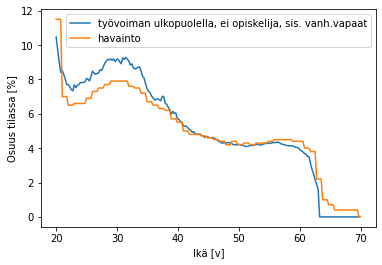

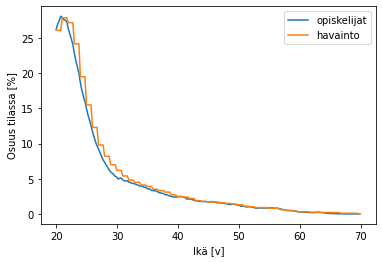

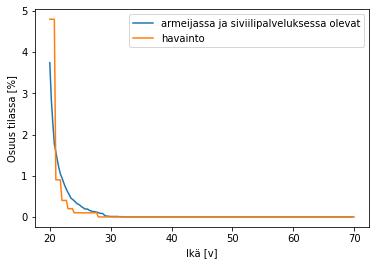

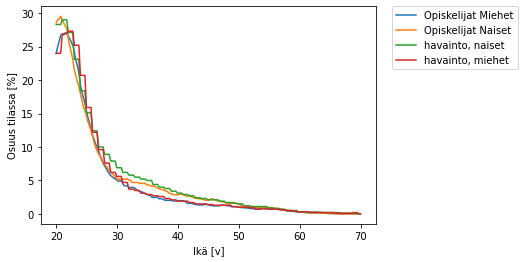

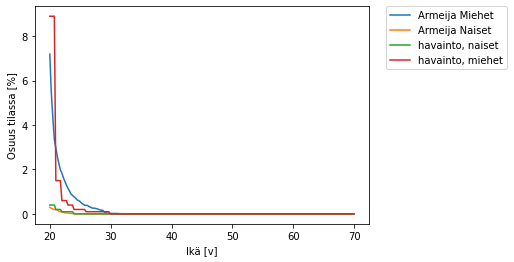

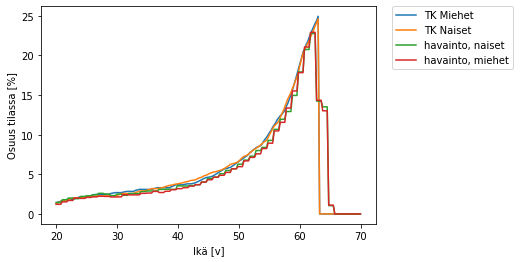

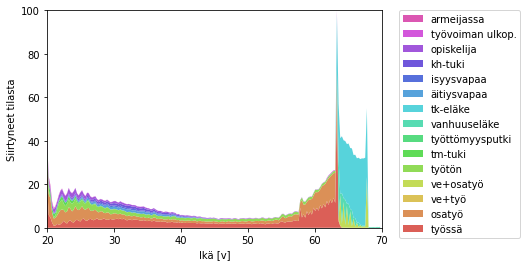

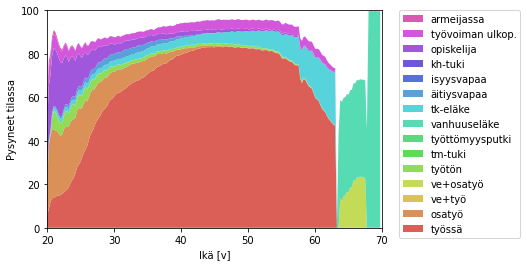

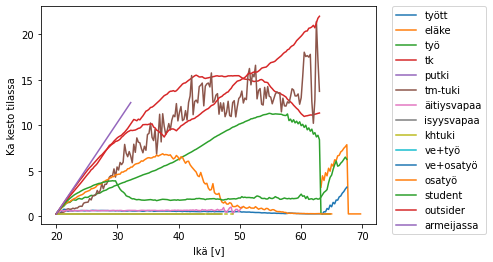

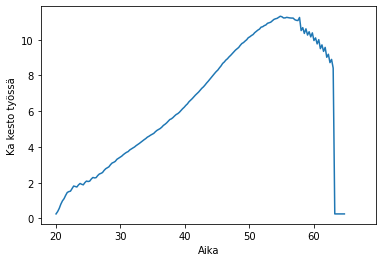

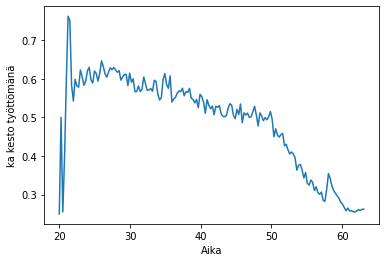

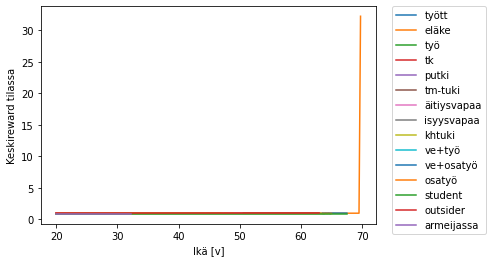

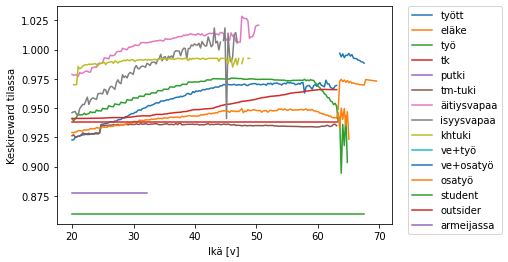

No handles with labels found to put in legend.


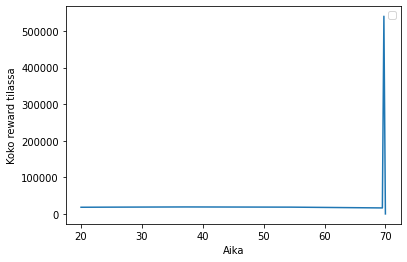

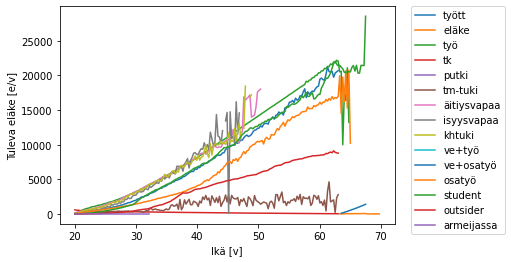

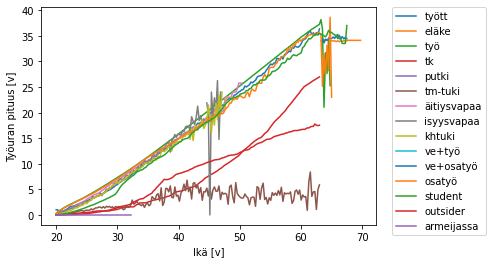

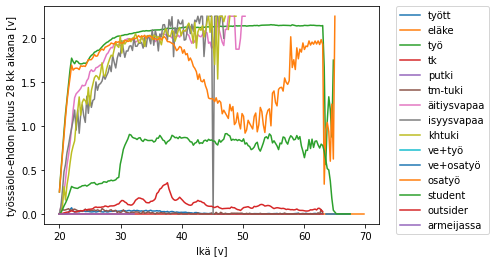

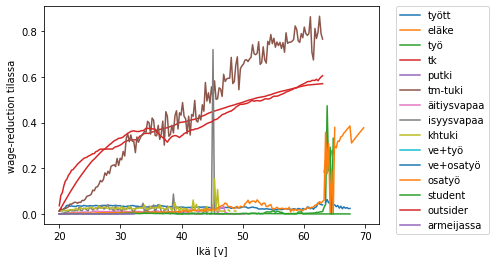

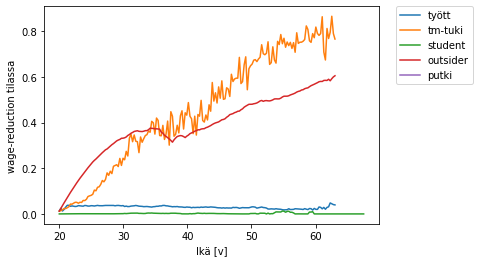

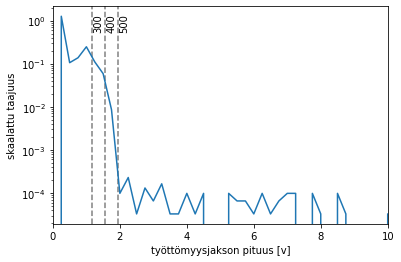

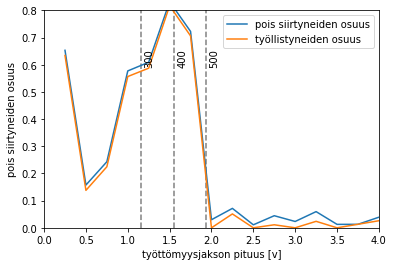

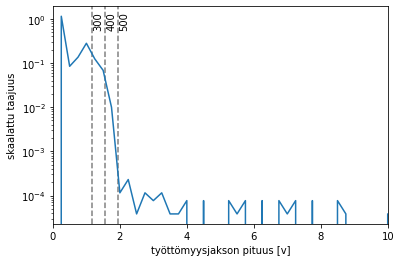

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


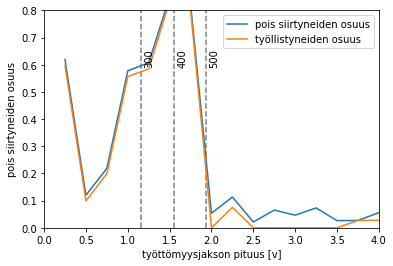

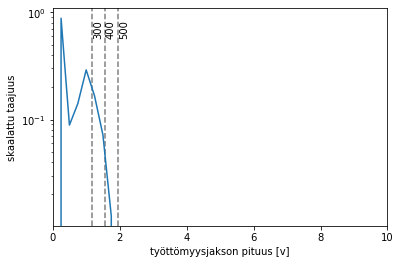

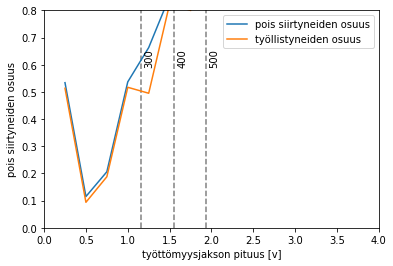

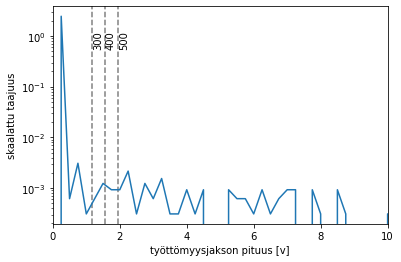

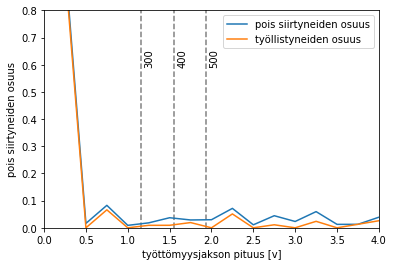

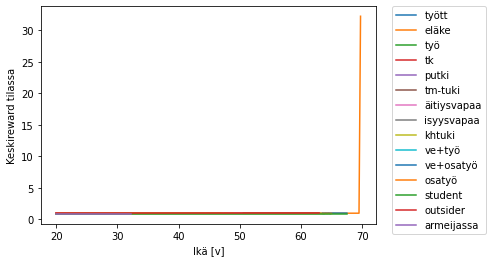

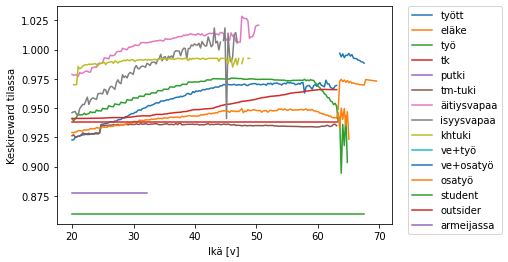

No handles with labels found to put in legend.


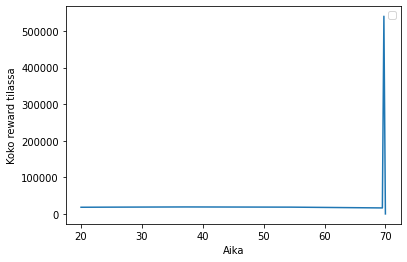

In [3]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.render(load=perusresults,figname='v2_')

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.env.unit_test_code_decode()

# IRR

In [ ]:
if True:
    cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
    cc1.load_sim(perusresults)
    cc1.episodestats.plot_irr(figname='kela')

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.env.test_comp_npv()